In [ ]:
## This notebook is used to average yearly temperature data into case year data
## Also used to plot the case year data, and the case year compared to climatology

## created by Kendra Herweck

In [1]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob

## Climatological Avg

In [2]:
filename_list=[]
for i in range(1980,2021):
    filename = 'Data/Temperature-Data/ERA/Yearly/ERA-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 41, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.98e+03 1.981e+03 1.982e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [4]:
clim_avg = combined_ds.mean('time')
print(clim_avg['temp'].values)

[[249.78963415 249.78963415 249.78963415 ... 249.78963415 249.78963415
  249.78963415]
 [249.74695122 249.74695122 249.74695122 ... 249.75       249.75
  249.74847561]
 [249.72713415 249.72713415 249.72713415 ... 249.72713415 249.72713415
  249.72713415]
 ...
 [298.69054878 298.68292683 298.67530488 ... 298.7179878  298.71036585
  298.70579268]
 [298.72560976 298.7195122  298.70426829 ... 298.75762195 298.74695122
  298.73780488]
 [298.76371951 298.75       298.74542683 ... 298.7972561  298.78810976
  298.77286585]]


In [5]:
print(clim_avg)

<xarray.Dataset>
Dimensions:  (x: 1440, y: 321)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(321,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
    temp     (y, x) float64 dask.array<chunksize=(321, 1440), meta=np.ndarray>


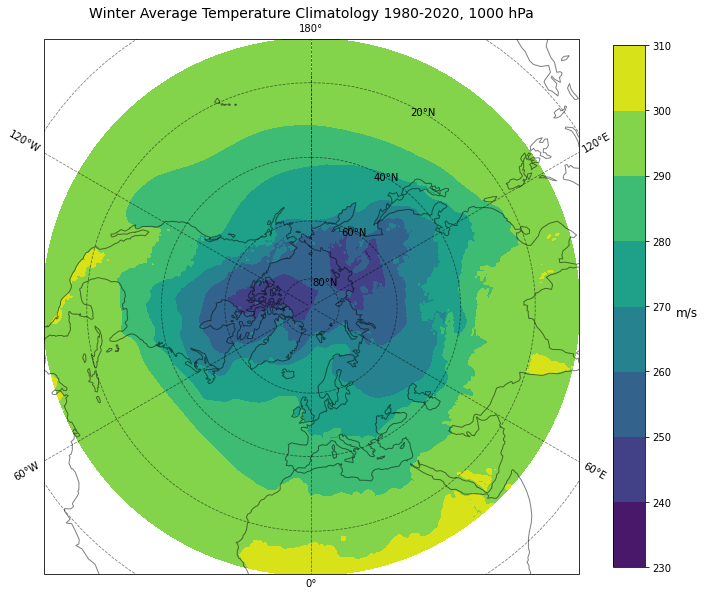

In [7]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind=clim_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Temperature Climatology 1980-2020, 1000 hPa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC Years Avg

In [8]:
filename_list=[]
for i in (1950,1951,1952,1955,1958,1959,1961,1964,1966,1968,1970,1971,1974,1976,1977,1979,1981,1984,1987,1989,1990,1993,
          1995,1997,1998,1999,2002,2005,2007,2010,2011,2012,2015,2016,2019,2020):
    filename = 'Data/Temperature-Data/ERA/Yearly/ERA-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 36, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.95e+03 1.951e+03 1.952e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [9]:
lowsic_avg = combined_ds.mean('time')
print(lowsic_avg['temp'].values)

[[248.05729167 248.05729167 248.05729167 ... 248.05729167 248.05729167
  248.05729167]
 [248.02951389 248.02951389 248.02951389 ... 248.03125    248.03125
  248.03125   ]
 [248.01388889 248.01388889 248.01388889 ... 248.01388889 248.01388889
  248.01388889]
 ...
 [298.49479167 298.484375   298.47743056 ... 298.53298611 298.51736111
  298.50868056]
 [298.52430556 298.51736111 298.50173611 ... 298.57118056 298.55555556
  298.53645833]
 [298.56770833 298.55555556 298.53819444 ... 298.60590278 298.59201389
  298.57465278]]


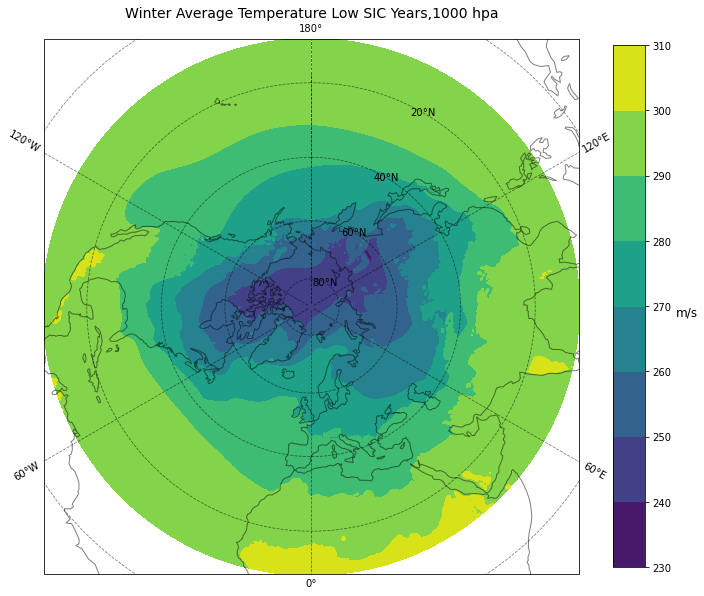

In [28]:
lat = lowsic_avg.variables['lat']
lon = lowsic_avg.variables['lon']

wind=lowsic_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Temperature Low SIC Years,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & EP Nino Avg

In [11]:
##Years: 1952,1970,1977,1987,1998,2007,2012

filename_list=[]
for i in (1952,1970,1977,1987,1998,2007,2012):
    filename = 'Data/Temperature-Data/ERA/Yearly/ERA-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 7, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.977e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [13]:
lowsic_ep_avg = combined_ds.mean('time')
print(lowsic_ep_avg['temp'].values)

[[248.70535714 248.70535714 248.70535714 ... 248.70535714 248.70535714
  248.70535714]
 [248.66071429 248.66071429 248.66071429 ... 248.66071429 248.66071429
  248.66071429]
 [248.64285714 248.64285714 248.64285714 ... 248.64285714 248.64285714
  248.64285714]
 ...
 [298.41964286 298.41071429 298.41071429 ... 298.46428571 298.46428571
  298.44642857]
 [298.46428571 298.46428571 298.4375     ... 298.52678571 298.5
  298.48214286]
 [298.51785714 298.51785714 298.49107143 ... 298.55357143 298.53571429
  298.52678571]]


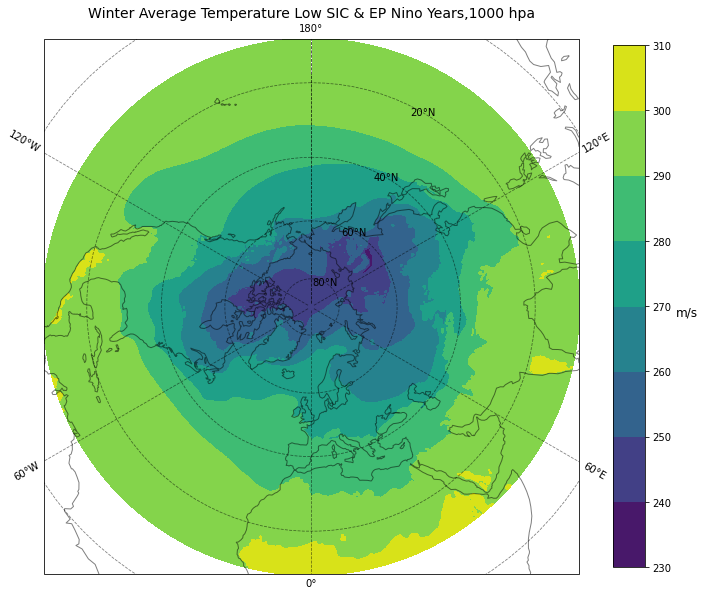

In [27]:
lat = lowsic_ep_avg.variables['lat']
lon = lowsic_ep_avg.variables['lon']

wind=lowsic_ep_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Temperature Low SIC & EP Nino Years,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & CP Nino Avg

In [15]:
#Years: 1958,1959,1964,1966,1995,2005,2010,2015,2016,2020

filename_list=[]
for i in (1958,1959,1964,1966,1995,2005,2010,2015,2016,2020):
    filename = 'Data/Temperature-Data/ERA/Yearly/ERA-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 10, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.958e+03 1.959e+03 1.964e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [16]:
lowsic_cp_avg = combined_ds.mean('time')
print(lowsic_cp_avg['temp'].values)

[[248.83125 248.83125 248.83125 ... 248.83125 248.83125 248.83125]
 [248.825   248.825   248.825   ... 248.825   248.825   248.825  ]
 [248.84375 248.84375 248.84375 ... 248.84375 248.84375 248.84375]
 ...
 [298.65625 298.6375  298.63125 ... 298.69375 298.66875 298.6625 ]
 [298.6875  298.675   298.65625 ... 298.74375 298.725   298.6875 ]
 [298.73125 298.71875 298.69375 ... 298.7625  298.74375 298.74375]]


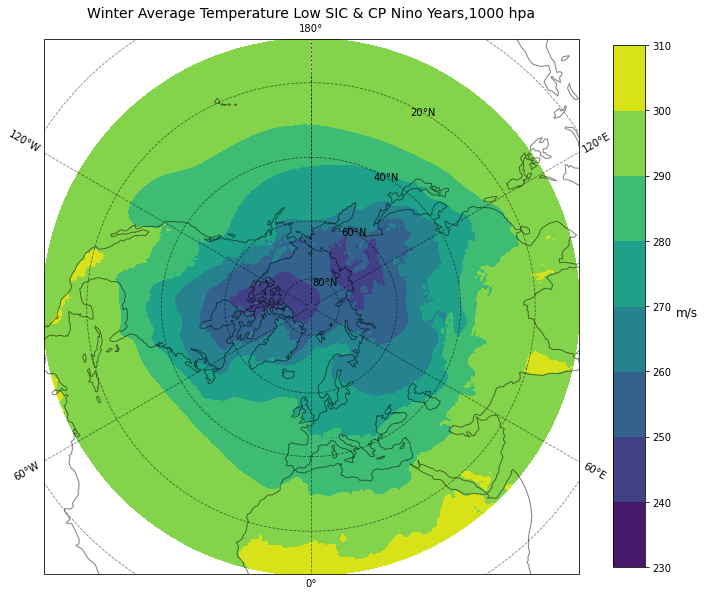

In [26]:
lat = lowsic_cp_avg.variables['lat']
lon = lowsic_cp_avg.variables['lon']

wind=lowsic_cp_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Temperature Low SIC & CP Nino Years,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All CP Nino Years

In [18]:
##Years: 1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020

filename_list=[]
for i in (1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020):
    filename = 'Data/Temperature-Data/ERA/Yearly/ERA-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 16, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.954e+03 1.958e+03 1.959e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [20]:
cp_avg = combined_ds.mean('time')
print(cp_avg['temp'].values)

[[248.25390625 248.25390625 248.25390625 ... 248.25390625 248.25390625
  248.25390625]
 [248.23046875 248.23046875 248.23046875 ... 248.23046875 248.23046875
  248.23046875]
 [248.2421875  248.2421875  248.2421875  ... 248.2421875  248.2421875
  248.2421875 ]
 ...
 [298.58984375 298.5703125  298.5625     ... 298.6171875  298.6015625
  298.59765625]
 [298.62109375 298.609375   298.59375    ... 298.66796875 298.65625
  298.62890625]
 [298.66796875 298.65625    298.640625   ... 298.6953125  298.68359375
  298.67578125]]


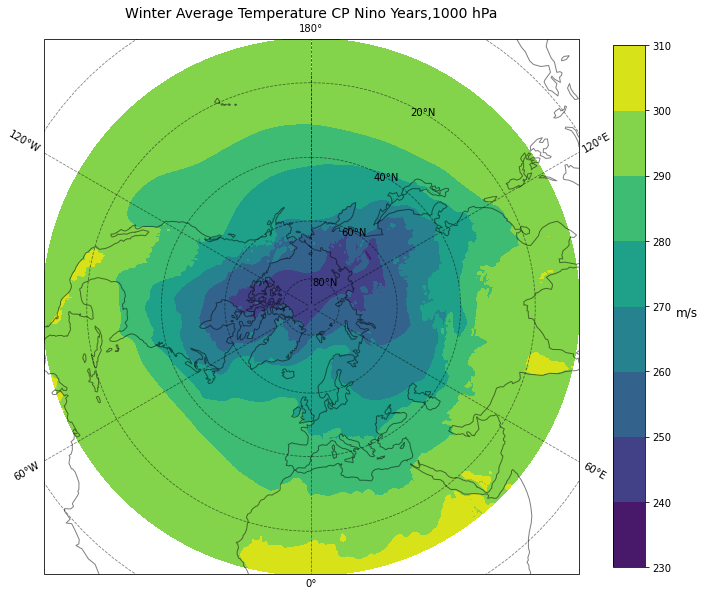

In [21]:
lat = cp_avg.variables['lat']
lon = cp_avg.variables['lon']

wind=cp_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Temperature CP Nino Years,1000 hPa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All EP Nino Years

In [22]:
##Years: 1952,1970,1973,1977,1983,1987,1998,2007,2012

filename_list=[]
for i in (1952,1970,1973,1977,1983,1987,1998,2007,2012):
    filename = 'Data/Temperature-Data/ERA/Yearly/ERA-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 9, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.973e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [24]:
ep_avg = combined_ds.mean('time')
print(ep_avg['temp'].values)

[[248.49305556 248.49305556 248.49305556 ... 248.49305556 248.49305556
  248.49305556]
 [248.45138889 248.45138889 248.45138889 ... 248.45138889 248.45138889
  248.45138889]
 [248.43055556 248.43055556 248.43055556 ... 248.43055556 248.43055556
  248.43055556]
 ...
 [298.26388889 298.26388889 298.26388889 ... 298.30555556 298.30555556
  298.29861111]
 [298.3125     298.3125     298.29166667 ... 298.36805556 298.34722222
  298.32638889]
 [298.36805556 298.36805556 298.34722222 ... 298.40277778 298.38888889
  298.375     ]]


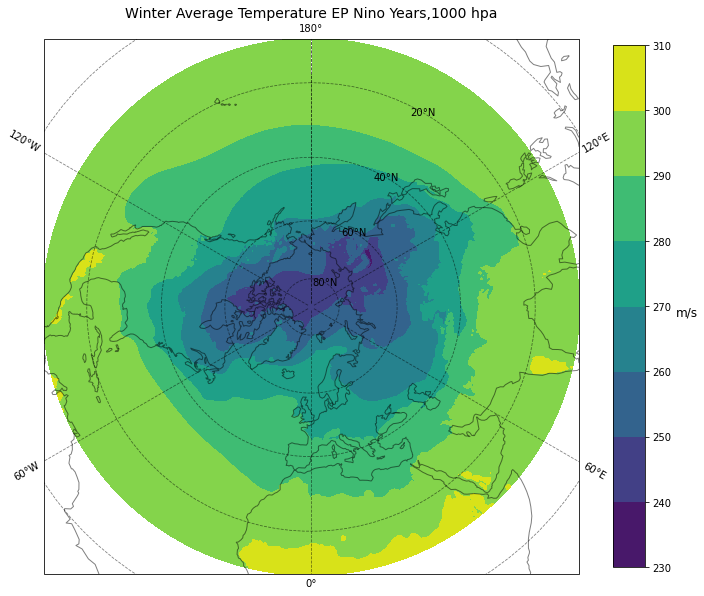

In [25]:
lat = ep_avg.variables['lat']
lon = ep_avg.variables['lon']

wind=ep_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Temperature EP Nino Years,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Difference Plots

### Low SIC - Climatology

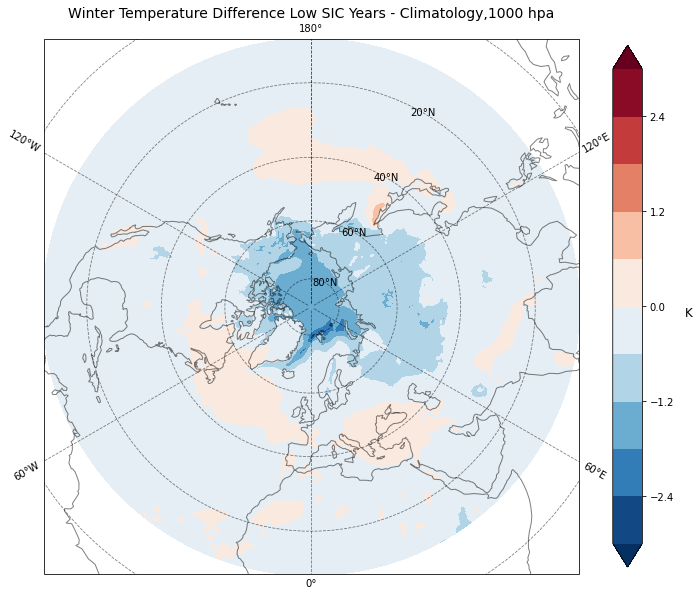

In [55]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=lowsic_avg['temp'][:,:]  ## 
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference Low SIC Years - Climatology,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### EP Nino - Climatology

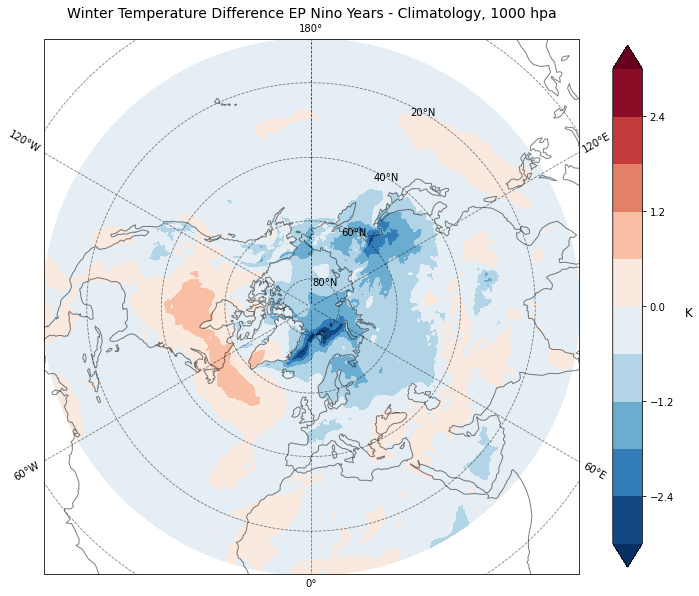

In [56]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=ep_avg['temp'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference EP Nino Years - Climatology, 1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### CP Nino - Climatology

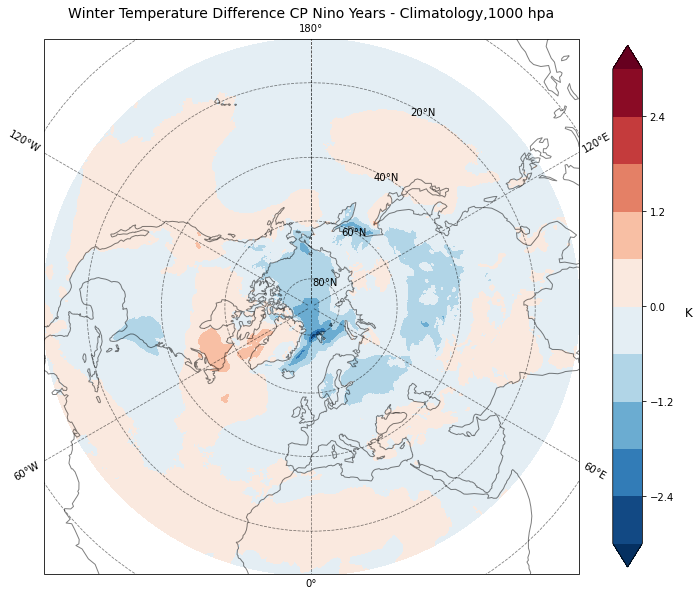

In [57]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=cp_avg['temp'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference CP Nino Years - Climatology,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & EP Nino - Climatology

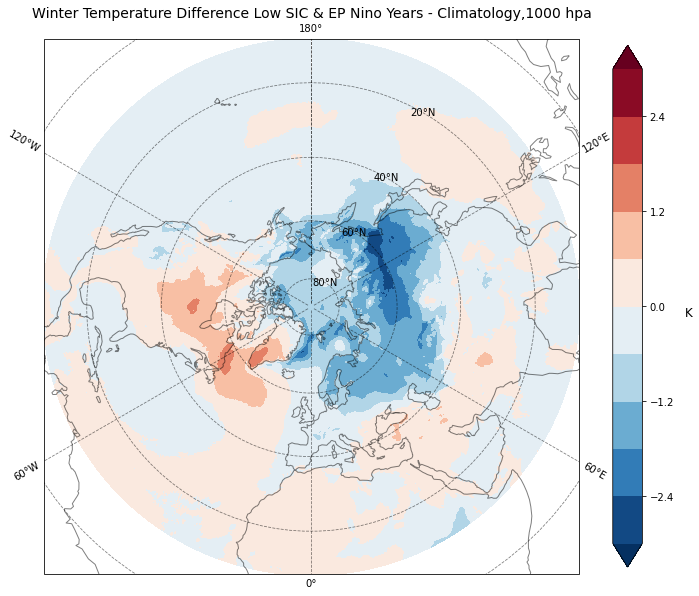

In [53]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=lowsic_ep_avg['temp'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference Low SIC & EP Nino Years - Climatology,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & CP Nino - Climatology

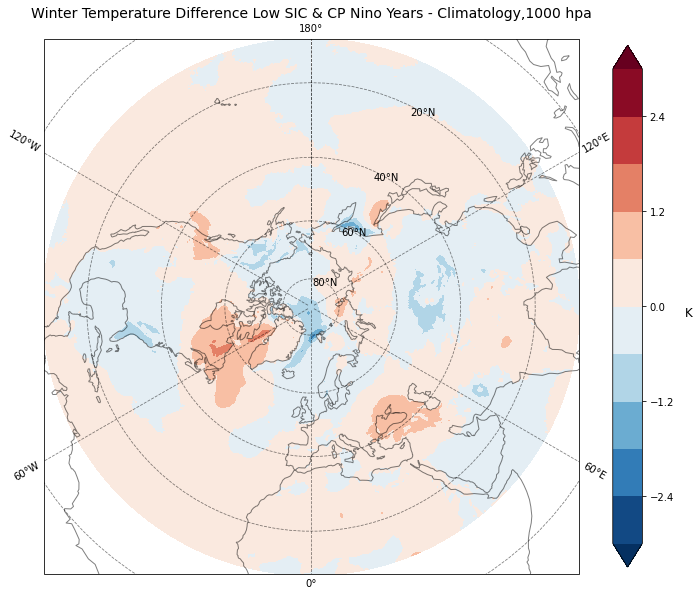

In [54]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=lowsic_cp_avg['temp'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference Low SIC & CP Nino Years - Climatology,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Difference Plots - US Focus

### Low SIC - Climatology

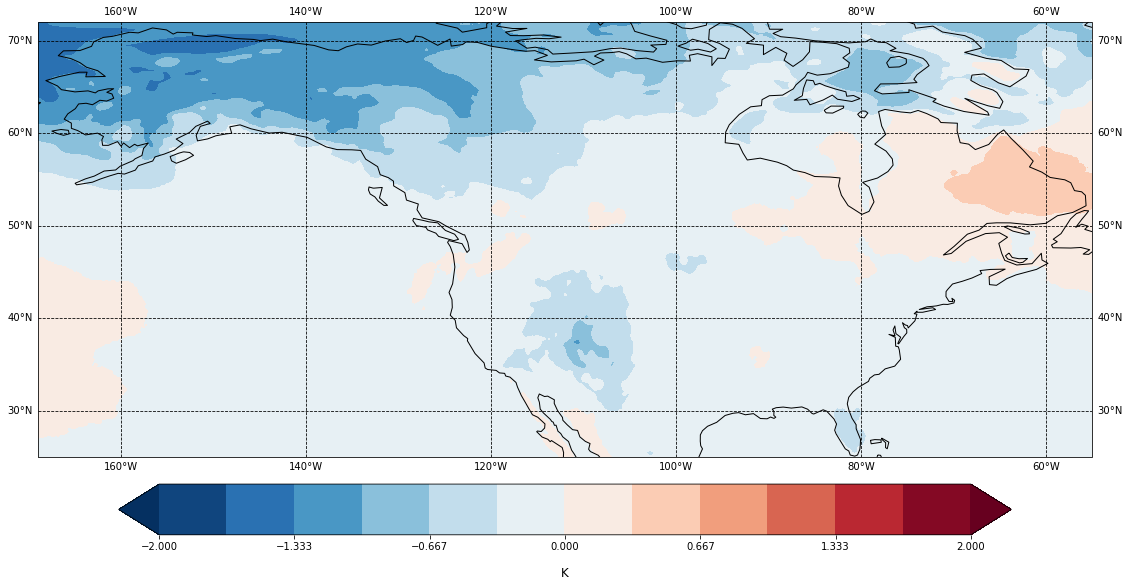

In [63]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


t1=clim_avg['temp'][:,:]  ## 
t2=lowsic_avg['temp'][:,:]  ##
temp = t2-t1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### EP Nino - Climatology

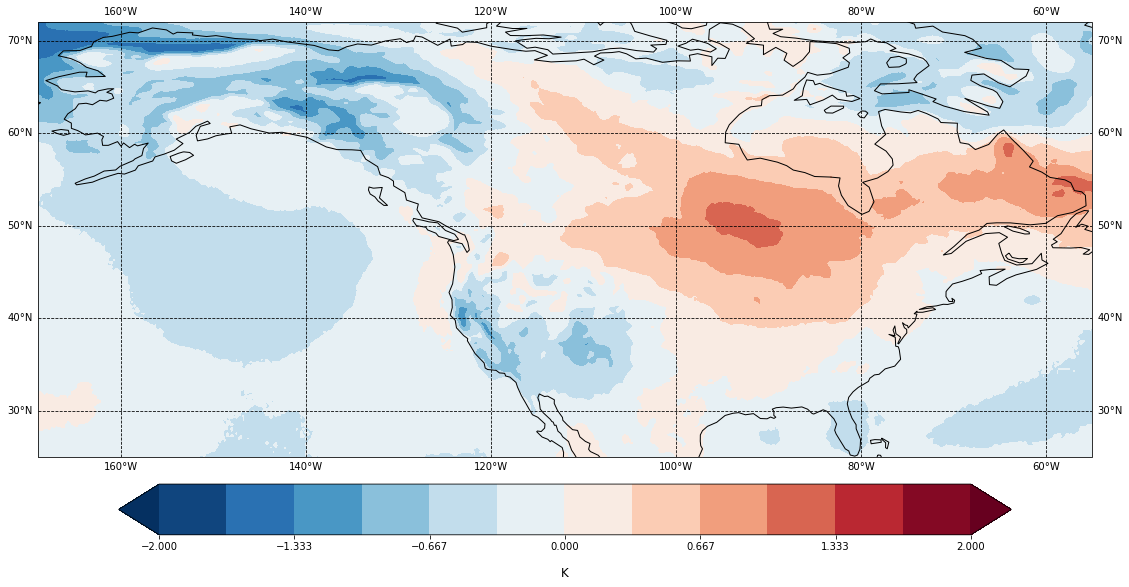

In [59]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

t1=clim_avg['temp'][:,:]  ## 
t2=ep_avg['temp'][:,:]  ##
temp = t2-t1   ##


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (EP Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### CP Nino - Climatology

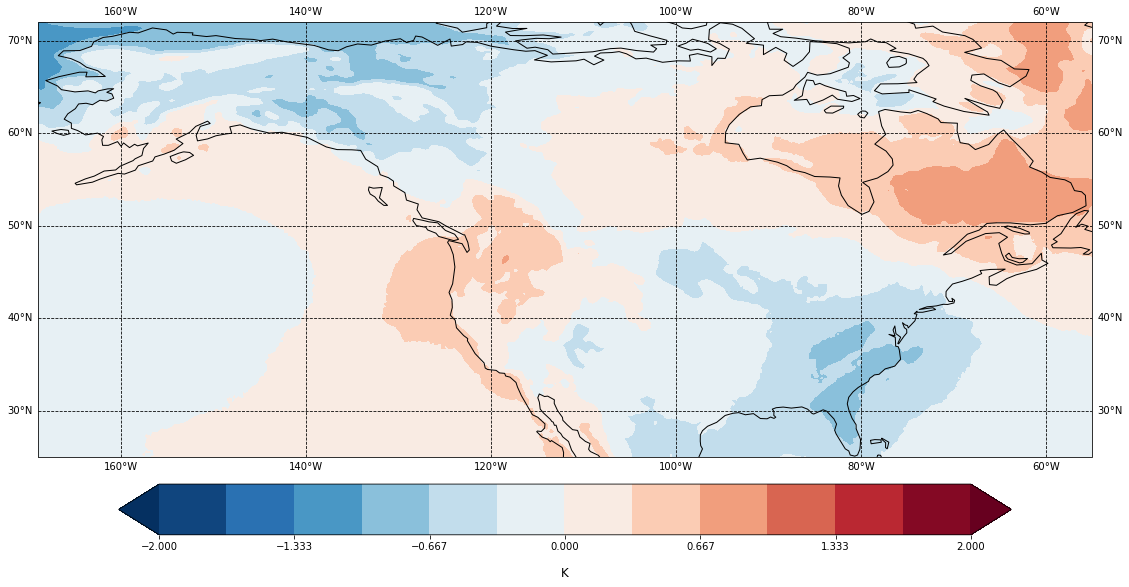

In [60]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

t1=clim_avg['temp'][:,:]  ## 
t2=cp_avg['temp'][:,:]  ##
temp = t2-t1   ##


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (CP Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & EP Nino - Climatology

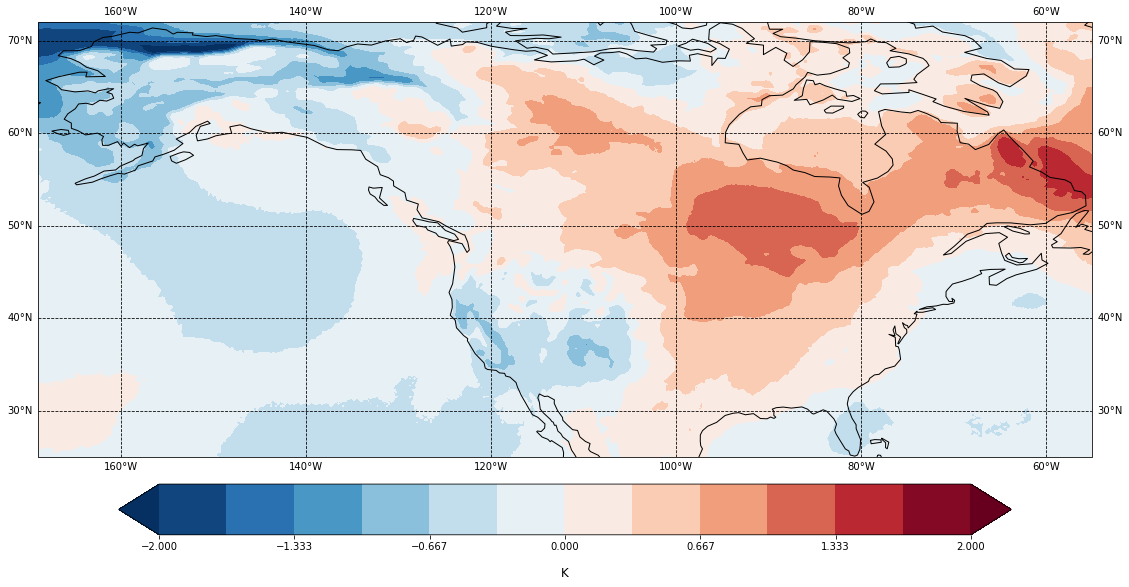

In [61]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


t1=clim_avg['temp'][:,:]  ## 
t2=lowsic_ep_avg['temp'][:,:]  ##
temp = t2-t1   ##

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC & EP Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())


### Low SIC & CP Nino - Climatology

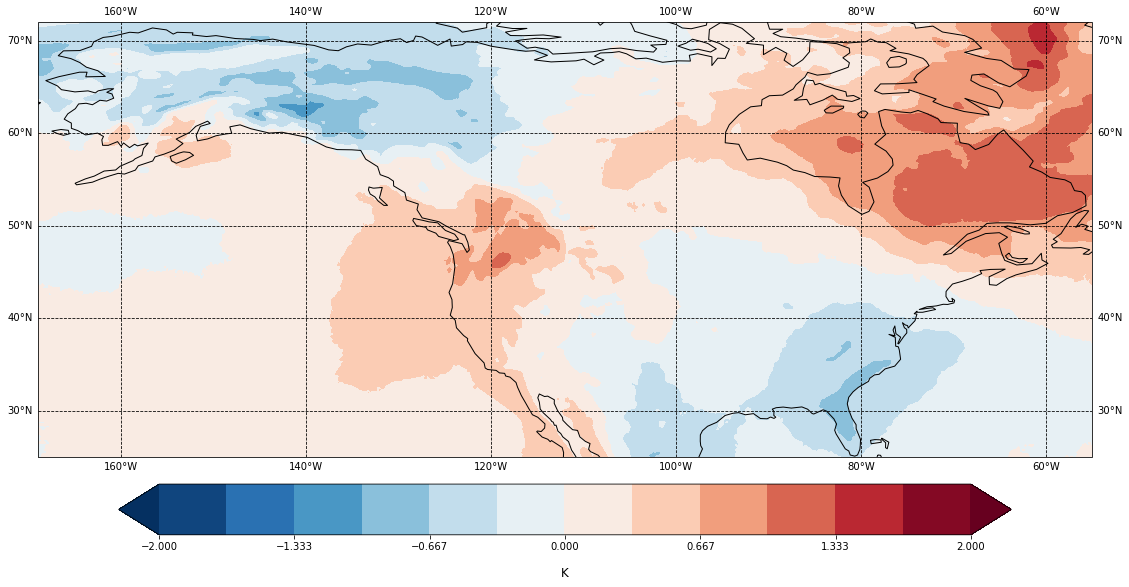

In [62]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


t1=clim_avg['temp'][:,:]  ## 
t2=lowsic_cp_avg['temp'][:,:]  ##
temp = t2-t1   ##

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC & CP Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())


# 2M Temp Plots

## Climatological Avg

In [65]:
filename_list=[]
for i in range(1980,2021):
    filename = 'Data/Temperature-Data/ERA/Yearly-2M/ERA-2M-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 41, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.98e+03 1.981e+03 1.982e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [66]:
clim_avg = combined_ds.mean('time')
print(clim_avg['temp'].values)

[[249.41310976 249.41310976 249.41310976 ... 249.41310976 249.41310976
  249.41310976]
 [249.2972561  249.2972561  249.29573171 ... 249.30030488 249.2972561
  249.2972561 ]
 [249.25304878 249.25152439 249.25152439 ... 249.25457317 249.25304878
  249.25304878]
 ...
 [299.59756098 299.58079268 299.57469512 ... 299.61737805 299.60823171
  299.61432927]
 [299.62195122 299.61280488 299.60060976 ... 299.6570122  299.64786585
  299.63262195]
 [299.65853659 299.64329268 299.63871951 ... 299.68140244 299.67530488
  299.66615854]]


In [67]:
print(clim_avg)

<xarray.Dataset>
Dimensions:  (x: 1440, y: 321)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(321,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
    temp     (y, x) float64 dask.array<chunksize=(321, 1440), meta=np.ndarray>


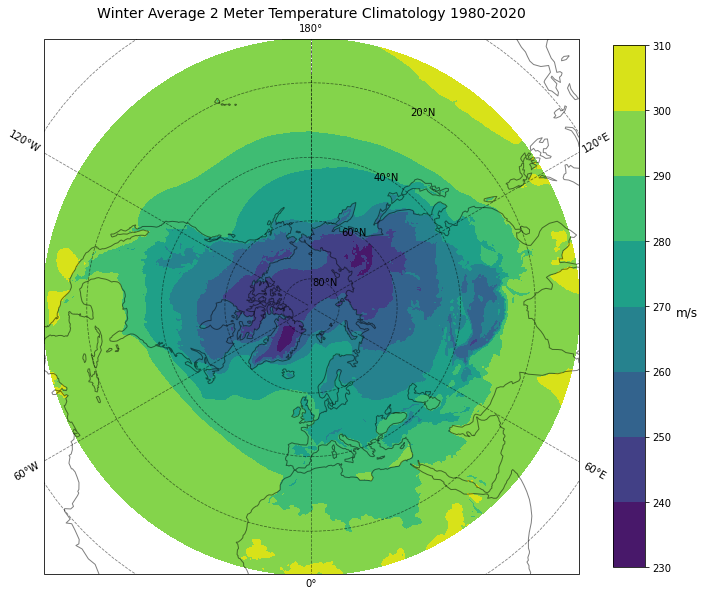

In [72]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind=clim_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average 2 Meter Temperature Climatology 1980-2020', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC Years Avg

In [69]:
filename_list=[]
for i in (1950,1951,1952,1955,1958,1959,1961,1964,1966,1968,1970,1971,1974,1976,1977,1979,1981,1984,1987,1989,1990,1993,
          1995,1997,1998,1999,2002,2005,2007,2010,2011,2012,2015,2016,2019,2020):
    filename = 'Data/Temperature-Data/ERA/Yearly-2M/ERA-2M-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 36, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.95e+03 1.951e+03 1.952e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [70]:
lowsic_avg = combined_ds.mean('time')
print(lowsic_avg['temp'].values)

[[247.35763889 247.35763889 247.35763889 ... 247.35763889 247.35763889
  247.35763889]
 [247.27951389 247.27951389 247.27951389 ... 247.28125    247.27951389
  247.27951389]
 [247.25       247.24652778 247.24652778 ... 247.25173611 247.25
  247.25      ]
 ...
 [299.41666667 299.39583333 299.390625   ... 299.45138889 299.43923611
  299.43402778]
 [299.44444444 299.42881944 299.41493056 ... 299.48958333 299.47395833
  299.45138889]
 [299.48263889 299.46006944 299.453125   ... 299.51388889 299.50520833
  299.48958333]]


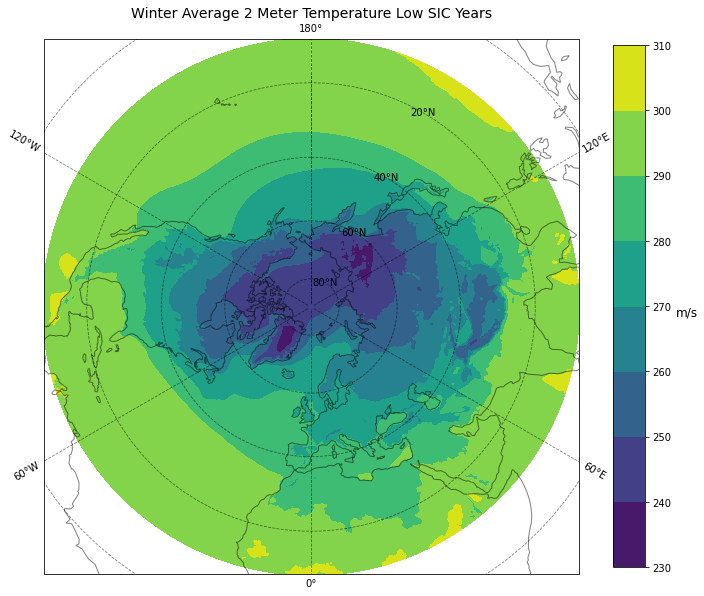

In [71]:
lat = lowsic_avg.variables['lat']
lon = lowsic_avg.variables['lon']

wind=lowsic_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average 2 Meter Temperature Low SIC Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & EP Nino Avg

In [73]:
##Years: 1952,1970,1977,1987,1998,2007,2012

filename_list=[]
for i in (1952,1970,1977,1987,1998,2007,2012):
    filename = 'Data/Temperature-Data/ERA/Yearly-2M/ERA-2M-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 7, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.977e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [74]:
lowsic_ep_avg = combined_ds.mean('time')
print(lowsic_ep_avg['temp'].values)

[[247.94642857 247.94642857 247.94642857 ... 247.94642857 247.94642857
  247.94642857]
 [247.89285714 247.89285714 247.89285714 ... 247.89285714 247.89285714
  247.89285714]
 [247.83035714 247.83035714 247.83035714 ... 247.83928571 247.83035714
  247.83035714]
 ...
 [299.35714286 299.33928571 299.33928571 ... 299.39285714 299.39285714
  299.38392857]
 [299.39285714 299.38392857 299.375      ... 299.44642857 299.42857143
  299.40178571]
 [299.44642857 299.42857143 299.41964286 ... 299.47321429 299.45535714
  299.44642857]]


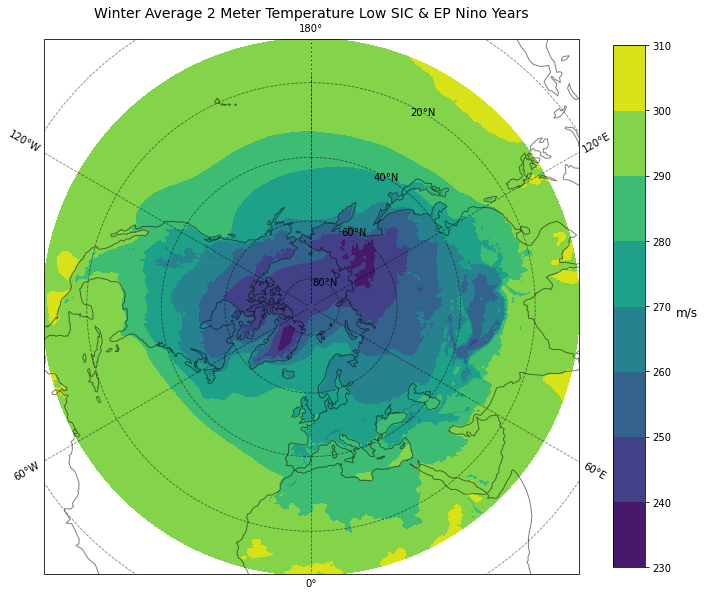

In [75]:
lat = lowsic_ep_avg.variables['lat']
lon = lowsic_ep_avg.variables['lon']

wind=lowsic_ep_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average 2 Meter Temperature Low SIC & EP Nino Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & CP Nino Avg

In [76]:
#Years: 1958,1959,1964,1966,1995,2005,2010,2015,2016,2020

filename_list=[]
for i in (1958,1959,1964,1966,1995,2005,2010,2015,2016,2020):
    filename = 'Data/Temperature-Data/ERA/Yearly-2M/ERA-2M-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 10, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.958e+03 1.959e+03 1.964e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [77]:
lowsic_cp_avg = combined_ds.mean('time')
print(lowsic_cp_avg['temp'].values)

[[247.8     247.8     247.8     ... 247.8     247.8     247.8    ]
 [247.76875 247.76875 247.76875 ... 247.76875 247.76875 247.76875]
 [247.775   247.775   247.775   ... 247.775   247.775   247.775  ]
 ...
 [299.5875  299.56875 299.55    ... 299.63125 299.60625 299.6    ]
 [299.61875 299.6     299.58125 ... 299.65625 299.64375 299.63125]
 [299.64375 299.63125 299.61875 ... 299.69375 299.6875  299.65625]]


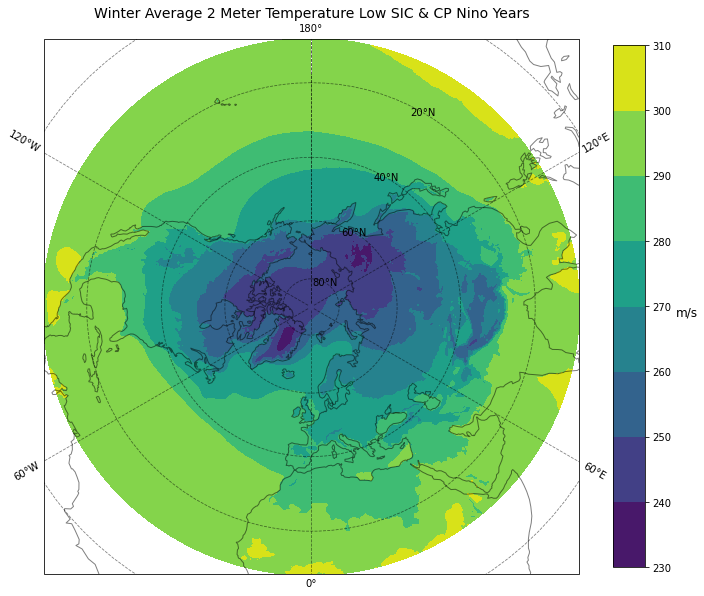

In [79]:
lat = lowsic_cp_avg.variables['lat']
lon = lowsic_cp_avg.variables['lon']

wind=lowsic_cp_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average 2 Meter Temperature Low SIC & CP Nino Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All CP Nino Years

In [80]:
##Years: 1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020

filename_list=[]
for i in (1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020):
    filename = 'Data/Temperature-Data/ERA/Yearly-2M/ERA-2M-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 16, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.954e+03 1.958e+03 1.959e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [81]:
cp_avg = combined_ds.mean('time')
print(cp_avg['temp'].values)

[[247.37890625 247.37890625 247.37890625 ... 247.37890625 247.37890625
  247.37890625]
 [247.32421875 247.32421875 247.32421875 ... 247.32421875 247.32421875
  247.32421875]
 [247.3125     247.3125     247.3125     ... 247.31640625 247.31640625
  247.3125    ]
 ...
 [299.51171875 299.4921875  299.47265625 ... 299.54296875 299.52734375
  299.51953125]
 [299.5390625  299.51953125 299.50390625 ... 299.578125   299.56640625
  299.5546875 ]
 [299.5703125  299.55859375 299.55078125 ... 299.609375   299.60546875
  299.578125  ]]


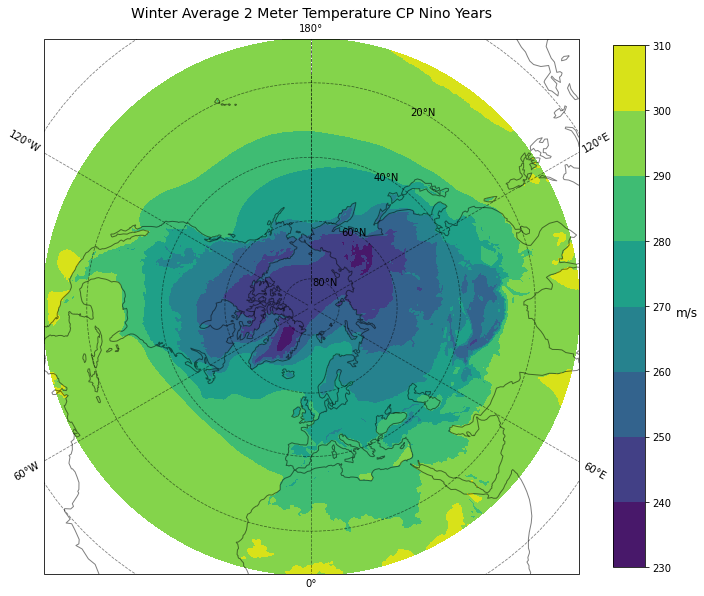

In [82]:
lat = cp_avg.variables['lat']
lon = cp_avg.variables['lon']

wind=cp_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average 2 Meter Temperature CP Nino Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All EP Nino Years

In [84]:
##Years: 1952,1970,1973,1977,1983,1987,1998,2007,2012

filename_list=[]
for i in (1952,1970,1973,1977,1983,1987,1998,2007,2012):
    filename = 'Data/Temperature-Data/ERA/Yearly-2M/ERA-2M-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 9, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.973e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [85]:
ep_avg = combined_ds.mean('time')
print(ep_avg['temp'].values)

[[247.78472222 247.78472222 247.78472222 ... 247.78472222 247.78472222
  247.78472222]
 [247.74305556 247.74305556 247.74305556 ... 247.74305556 247.74305556
  247.74305556]
 [247.67361111 247.67361111 247.67361111 ... 247.68055556 247.67361111
  247.67361111]
 ...
 [299.22916667 299.21527778 299.20833333 ... 299.25694444 299.25694444
  299.25694444]
 [299.26388889 299.25694444 299.25       ... 299.3125     299.29861111
  299.27777778]
 [299.31944444 299.30555556 299.29861111 ... 299.34722222 299.32638889
  299.31944444]]


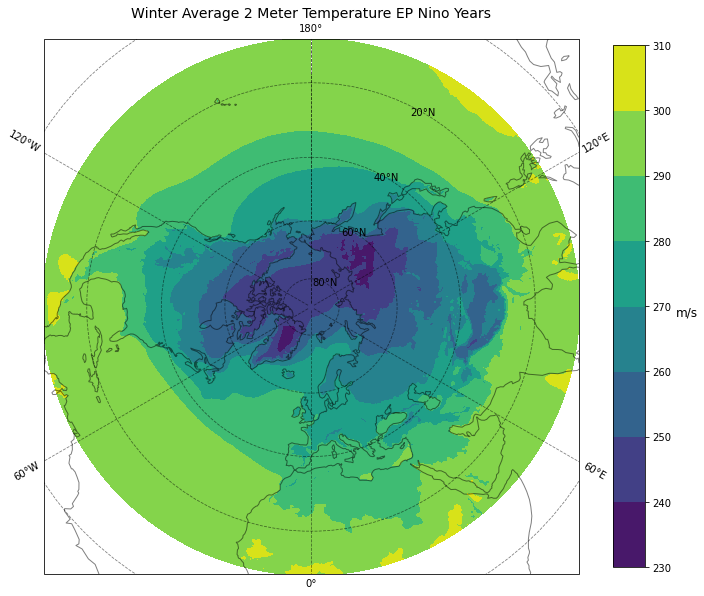

In [86]:
lat = ep_avg.variables['lat']
lon = ep_avg.variables['lon']

wind=ep_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average 2 Meter Temperature EP Nino Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# 2M Difference Plots

### Low SIC - Climatology

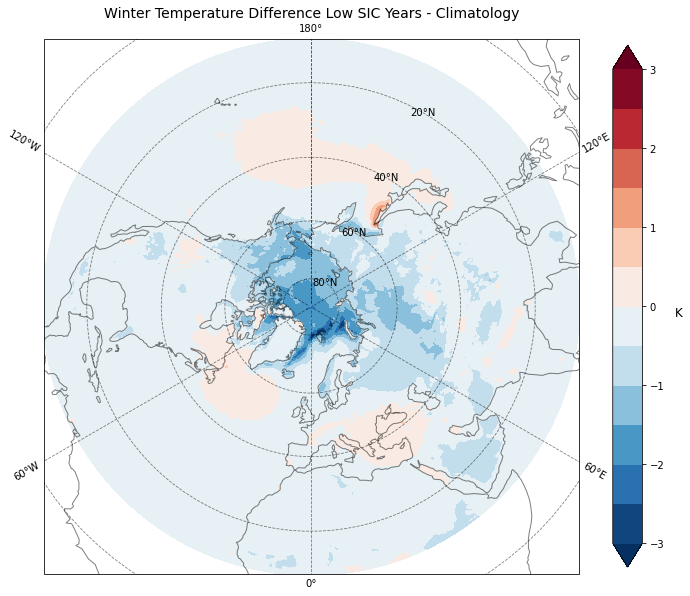

In [99]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=lowsic_avg['temp'][:,:]  ## 
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 13)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference Low SIC Years - Climatology', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### EP Nino - Climatology

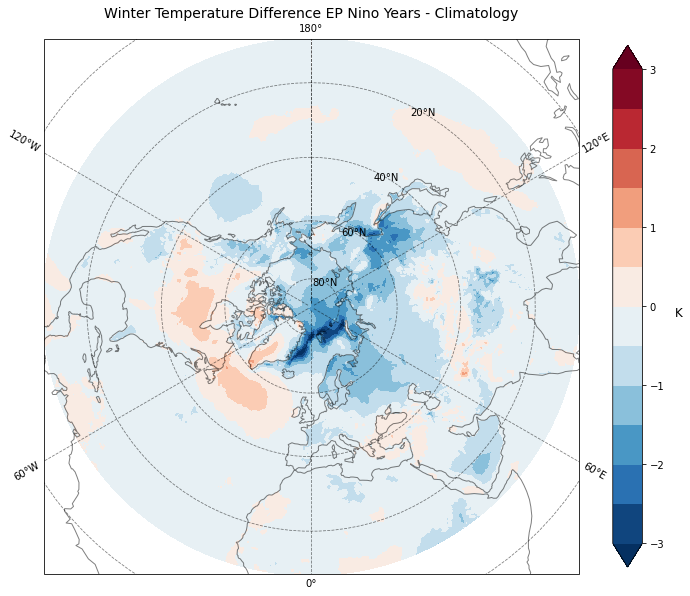

In [100]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=ep_avg['temp'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 13)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference EP Nino Years - Climatology', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### CP Nino - Climatology

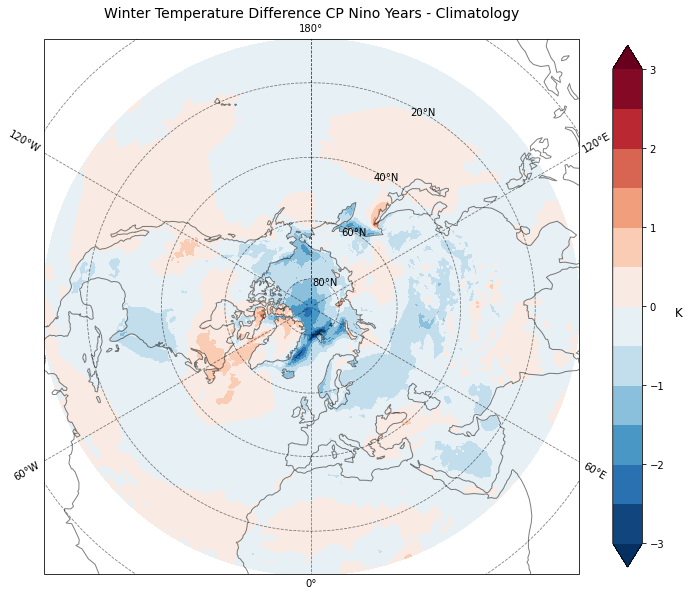

In [101]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=cp_avg['temp'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 13)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference CP Nino Years - Climatology', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & EP Nino - Climatology

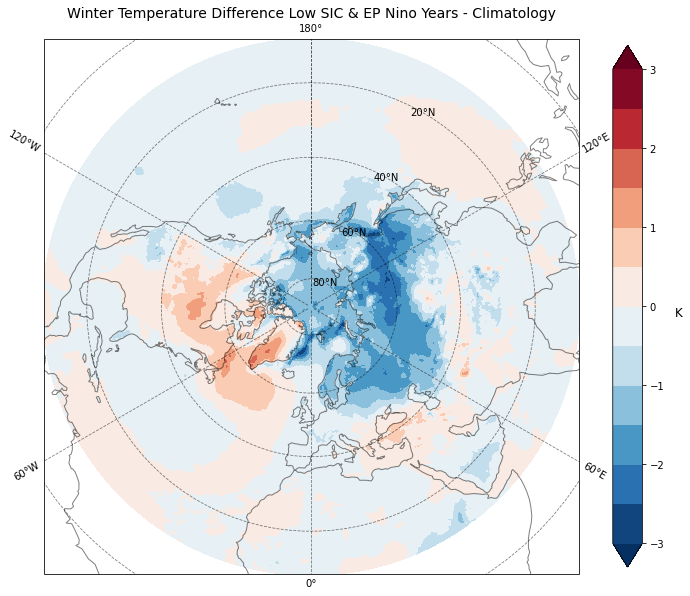

In [102]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=lowsic_ep_avg['temp'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 13)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference Low SIC & EP Nino Years - Climatology', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & CP Nino - Climatology

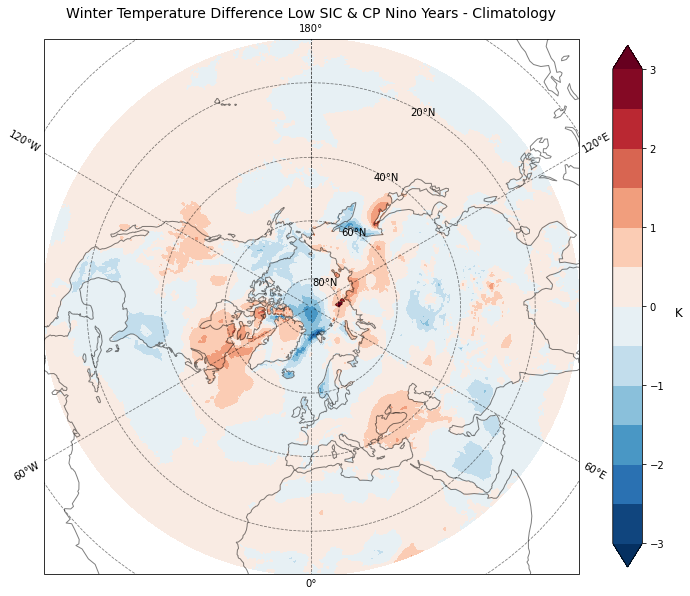

In [103]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['temp'][:,:]  ## 
wind2=lowsic_cp_avg['temp'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 13)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference Low SIC & CP Nino Years - Climatology', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# 2M Difference Plots - US Focus

### Low SIC - Climatology

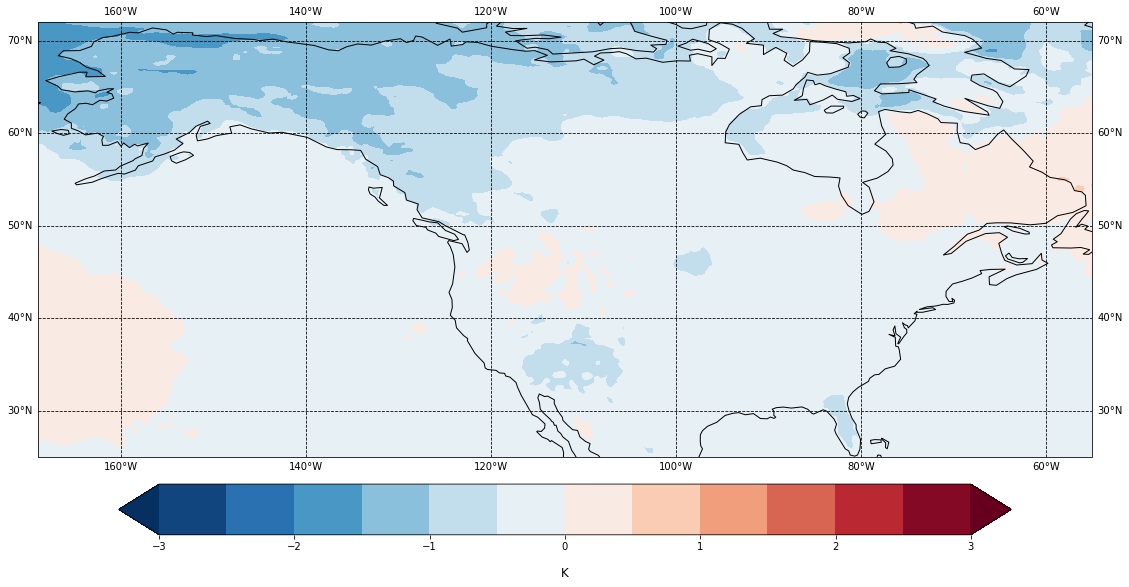

In [95]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


t1=clim_avg['temp'][:,:]  ## 
t2=lowsic_avg['temp'][:,:]  ##
temp = t2-t1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### EP Nino - Climatology

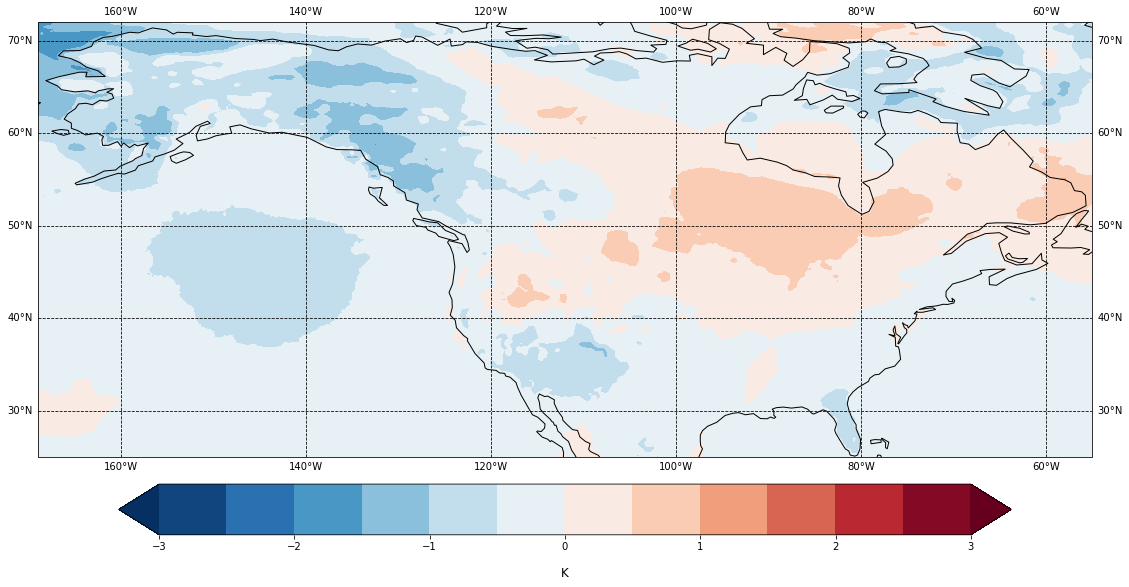

In [94]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

t1=clim_avg['temp'][:,:]  ## 
t2=ep_avg['temp'][:,:]  ##
temp = t2-t1   ##


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (EP Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### CP Nino - Climatology

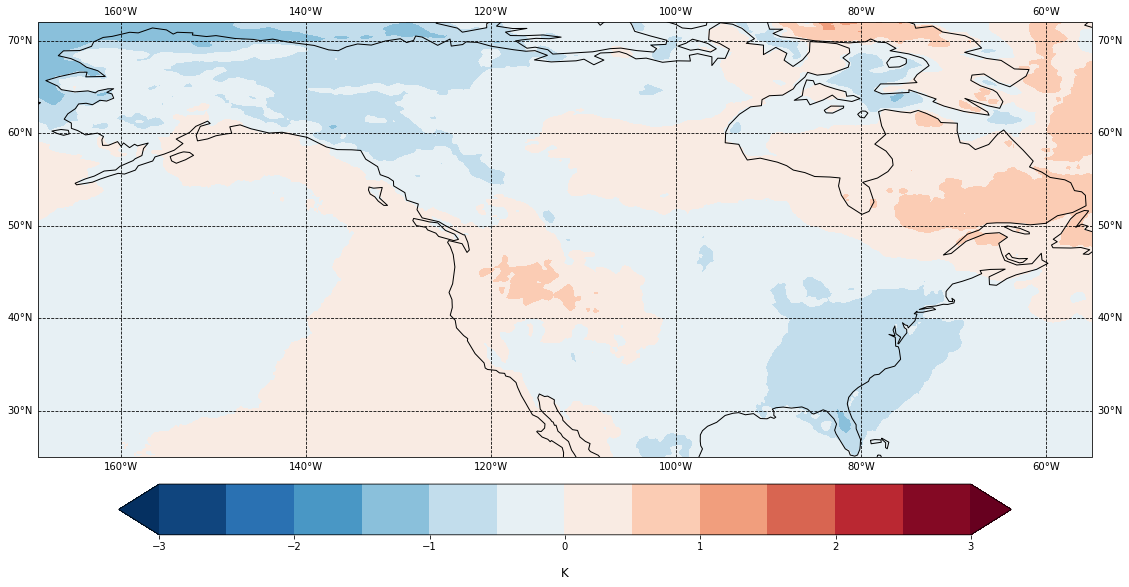

In [96]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

t1=clim_avg['temp'][:,:]  ## 
t2=cp_avg['temp'][:,:]  ##
temp = t2-t1   ##


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (CP Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & EP Nino - Climatology

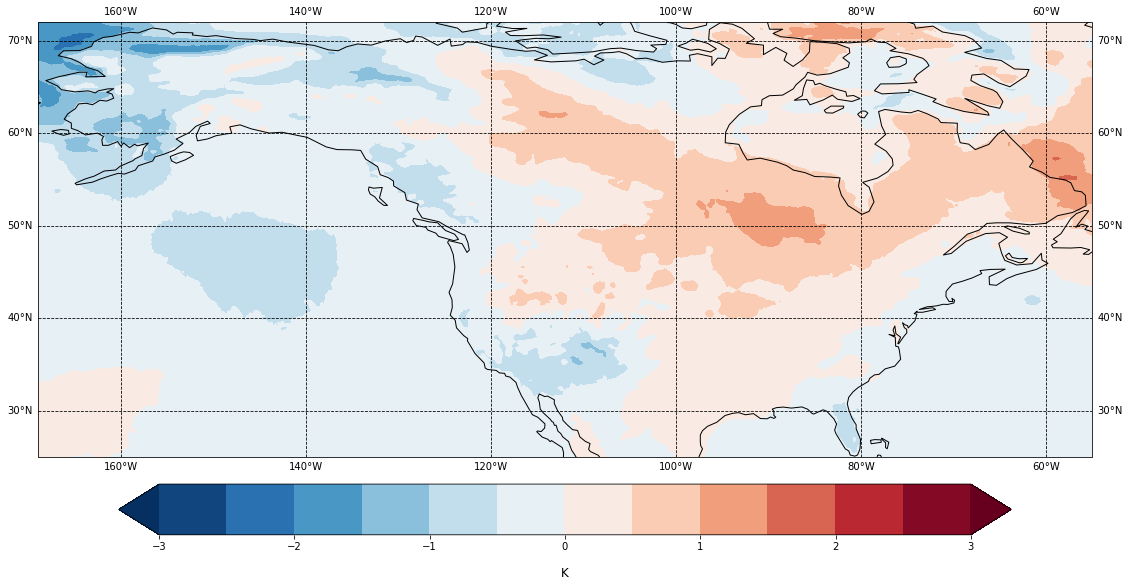

In [97]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


t1=clim_avg['temp'][:,:]  ## 
t2=lowsic_ep_avg['temp'][:,:]  ##
temp = t2-t1   ##

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC & EP Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())


### Low SIC & CP Nino - Climatology

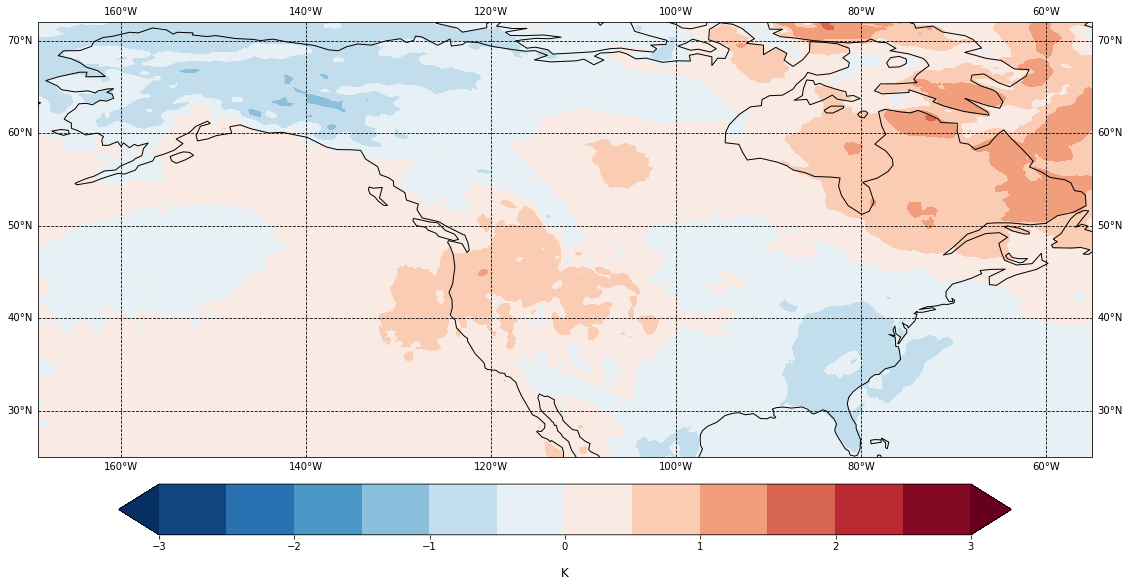

In [98]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


t1=clim_avg['temp'][:,:]  ## 
t2=lowsic_cp_avg['temp'][:,:]  ##
temp = t2-t1   ##

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC & CP Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())
